In [23]:
!git mv '/Users/tasha/Desktop/comento/mywork/01_데이터셋_구축_코드.ipynb''/Users/tasha/Desktop/comento/mywork/01_yolo_데이터셋_구축_코드.ipynb'
!git commit -m "rename file"
!git push origin main

[main 35b8b35] edit) labels path
 1 file changed, 41 insertions(+), 43 deletions(-)
오브젝트 나열하는 중: 5, 완료.
오브젝트 개수 세는 중: 100% (5/5), 완료.
Delta compression using up to 8 threads
오브젝트 압축하는 중: 100% (3/3), 완료.
오브젝트 쓰는 중: 100% (3/3), 580.03 KiB | 12.61 MiB/s, 완료.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/tashapark/cctv_object_detection.git
   d982f9e..35b8b35  main -> main


# 0. 객체탐지(b-box) 모델을 조사
- 조사한 모델이 예상 성능 요구 사항을 충족시킬 수 있는지 확인해주세요. 확인한 내용을 **PPT 1장~3장**으로 정리해서 제출해주세요.
- 모델의 라이센스, 오픈 모델의 성능을 파악해서 왜 해당 모델을 선택했는지 작성이 되어야합니다.
- 업무요청 가이드에서는 yolov5 모델을 baseline모델로 사용하라고 되어있지만, 다른 b-box 모델을 조사했을 때 더 좋은 성능의 모델이 있다면 그 모델로 진행해도 좋습니다.


# 데이터셋 구축
- 아래의 코드 가이드를 참고해서 데이터셋 구축하는 코드를 작성해주세요
- 완료된 데이터셋 구축 코드는 **.ipynb 파일을 다운해서 제출**해주세요.

# 1. Mount google drive
- 코랩을 활용할 경우, 구글 드라이브에 있는 데이터를 사용하기 위해서 마운트 작업이 필요합니다.
- 로컬에서 진행할 경우엔 생략해주세요.
- 로컬에서 진행할 경우엔 conda를 활용하여 가상환경을 세팅해주세요.

# 2. Import Library
- 코드에 사용되는 파이썬 라이브러리를 불러옵니다.

In [16]:
#가상환경 생성 후 인스톨이 늘어남. 
#!pip install opencv-python
#!pip install matplotlib
#!pip install tqdm
#!pip install scikit-learn

In [2]:
import os
import cv2
import glob
import shutil
import warnings
import matplotlib.pyplot as plt

from tqdm.auto import tqdm       # 작업 진행 속도를 보는데 유용한 라이브러리입니다.
from sklearn.model_selection import train_test_split

In [3]:
#!pip show tqdm

In [4]:
# warning 무시 코드
warnings.filterwarnings(action='ignore')

In [5]:
# 현재 실행 파일 경로 확인
os.getcwd()

'/Users/tasha/Desktop/comento/mywork'

# 3. 데이터셋 준비
- 데이콘의 데이터셋은 차종으로 라벨링 되어 있는데, 우리는 차 종류를 객체탐지하는 것이 아닌 "차"를 객체탐지하는 것이 목표입니다.
- 차 종류로 라벨링 된 text파일 데이터를 수정해야합니다.

In [6]:
# 기존에 존재하던 데이터셋 폴더 경로 정의
origin_dir = '/Users/tasha/Desktop/comento/dataset/train'  # ex: '/content/drive/MyDrive/comento/1/dataset/data'

import glob

# 원본 라벨파일(.txt) 불러오기
origin_label = f'{origin_dir}/*.txt'
label_txts = glob.glob(origin_label)

print('라벨파일(.txt) 개수 : ',len(label_txts))

라벨파일(.txt) 개수 :  6481


In [7]:
# 수정된 라벨을 저장하는 폴더 경로 정의
edit_label_dir = '/Users/tasha/Desktop/comento/dataset/label_data' # ex: '/content/drive/MyDrive/comento/1/dataset/label_data'

import os

# 수정된 라벨링 데이터 저장 폴더를 생성
if not os.path.exists(edit_label_dir):
    os.mkdir(edit_label_dir)

# 4. Yolo 모델링을 위한 라벨링 데이터 수정
- 모든 데이터의 라벨을 "car"로 변경해야합니다.
- 기존 데이터셋의 Labelme 형태를 yolo format을 따라 라벨링 파일을 변경해야합니다.
- 참고 자료: https://docs.ultralytics.com/datasets/detect/#ultralytics-yolo-format


### 코드 설계 참고
- 코드를 작성하기 전에 구현하고자하는 로직을 텍스트로 설계해보는 연습도 많이 하면 좋을 것 같습니다.
1. 기존의 모든 라벨 데이터를 읽기모드로 불러와서 반복문으로 데이터 파일을 하나씩 열어줍니다.
2. 1번에서 불러온 라벨데이터(.txt)는 Labelme 형태로 <classId, x1, y1, x2, y2, x3, y3, x4, y4>에 맞게 값을 따로 정의해줍니다.
  - 참고 : strip().split(' ') 라이브러리 활용 가능
3. 모든 데이터의 라벨을 "car" 하나로만 변경해야하므로, classId는 0으로 변경해주세요
4. 2번에서 불러온 좌표값들을 활용하여 yolo 라벨 형태에 맞게 중심좌표와 너비/높이를 계산해줍니다.
5. 수정된 라벨을 새로운 파일로 저장해줍니다. (라벨 파일명은 매칭되는 이미지파일명과 동일해야합니다.)

In [13]:
# 이미지 크기 
''' 피드백
y축 오차가 발생하는 원인은 b-box 높이가 실제보다 크게 설정되어 있어서로 보입니다.
이미지의 너비와 높이를 미리 설정하거나 각 파일에서 가져오도록 조정하면 좋을 것 같습니다. 
데이터셋 내 모든 이미지가 동일한 크기라면 괜찮지만, 다른 해상도를 가진 이미지도 있다면 cv2.imread() 또는 PIL.Image.open()을 사용하여 txt파일과 매칭되는 이미지를 개별적으로 불러오는 것이 좋습니다.
참고로 제가 확인해본 이미지 1920*1040인 사이즈였습니다!
'''

import glob
import cv2
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# train 폴더 내 PNG 파일 경로 찾기
origin_dir = '/Users/tasha/Desktop/comento/dataset/train' 
image_files = glob.glob(f'{origin_dir}/*.png')  # train 폴더 내 모든 .png 파일 찾기

# 첫 번째 이미지 크기 기준 설정
example_image = image_files[0]  # 첫 번째 이미지 예시
example_width, example_height = None, None

# 첫 번째 이미지 크기 가져오기
if example_image:
    img_cv = cv2.imread(example_image, cv2.IMREAD_UNCHANGED)
    if img_cv is not None:
        example_height, example_width = img_cv.shape[:2]
        print(f"Example Image: {example_image}, Width: {example_width}, Height: {example_height}")
    else:
        print(f"Failed to load example image: {example_image}")
        exit()

# 크기 비교 함수
def check_image_size(image_path):
    img_cv = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img_cv is not None:
        h, w = img_cv.shape[:2]
        if w != example_width or h != example_height:
            return image_path, w, h
    return None

# 병렬 처리로 이미지 크기 비교 (tqdm 사용) # 이렇게 해야 빠름. 
def process_images_with_tqdm(image_files):
    results = []
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(check_image_size, image_path): image_path for image_path in image_files}
        
        # tqdm으로 진행 상황 확인
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing images", ncols=100, miniters=1, dynamic_ncols=True):
            result = future.result()
            if result:
                image_path, w, h = result
                results.append((image_path, w, h))
                print(f"Different Image: {image_path}, Width: {w}, Height: {h}")
    return results

# 이미지 처리 실행
results = process_images_with_tqdm(image_files)

Example Image: /Users/tasha/Desktop/comento/dataset/train/syn_00710.png, Width: 1920, Height: 1040


Processing images: 100%|████████████████████| 6481/6481 [01:30<00:00, 71.59it/s]


In [14]:
# 라벨 데이터 수정 코드 작성

#1. 모든 라벨 데이터를 읽기 모드로 불러오기
origin_dir = '/Users/tasha/Desktop/comento/dataset/train' 
origin_label = f'{origin_dir}/*.txt'
label_txts = glob.glob(origin_label)

W, H = 1920, 1040 #데이터 값 수정

# tqdm 적용하여 진행률 표시
for label_txt in tqdm(label_txts, desc="Processing Labels"):
    with open(label_txt, 'r') as f:
        lines = f.readlines()
        #for line in lines:
            #print(line.strip())

# 2. 1번에서 불러온 라벨데이터(.txt)는 Labelme 형태로 
#<classId, x1, y1, x2, y2, x3, y3, x4, y4>에 맞게 값을 따로 정의
    new_lines = []
    
    for line in lines: 
        data = list(map(float, line.strip().split(" "))) #공백 없앴고, ""로 나눠서

        #id 변경
        class_id = 0
    
        # 좌표
        x1, y1, x2, y2, x3, y3, x4, y4 = data[1:] 
    
    
    # 4. labelme 형태를 yolo 형식으로 변경,
    # yolo <classId> <x_center> <y_center> <width> <height>
        
        # 바운딩 박스 x, y의 최소/최댓값
        x_min = min(x1, x2, x3, x4)
        y_min = min(y1, y2, y3, y4) 
        x_max = max(x1, x2, x3, x4)
        y_max = max(y1, y2, y3, y4)  
    
        #좌표 계산 
        x_center = (x_min + x_max)/2
        y_center = (y_min + y_max)/2
        width = x_max - x_min
        height = y_max - y_min

        # y_center 오차 보정 (아래로)
        #y_center += height * 0.06 # 5%밑으로 
        
    
        # 정규화 (0~1 범위) - 이미지 크기에 따라 헷갈리기 때문에, 정규화해야 함. 
        x_center /= W
        y_center /= H
        width /= W
        height /= H
    
        #새로운 yolo 형식 라벨 생성
        new_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

#5.수정된 라벨을 새로운 파일로 저장. (라벨 파일명은 매칭되는 이미지파일명과 동일해야합니다.)
    new_label_path = os.path.join(edit_label_dir, os.path.basename(label_txt)) #기존 파일명 유지
    with open(new_label_path, 'w') as f:
        f.writelines(new_lines)

print("저장 끝")

Processing Labels: 100%|██████████████████| 6481/6481 [00:01<00:00, 3416.09it/s]

저장 끝


# 5. 라벨이 제대로 수정되었는지 확인하기
- 아래 함수를 통해 라벨이 제대로 수정되었는지 시각화해서 확인해주세요.
- 항상 작업을 완료후에는 결과를 확인하면서 이슈가 없는지 파악해야합니다.

읽은 라벨 개수: 3
클래스 0: (1037, 217) → (1335, 493)
클래스 0: (783, 438) → (1075, 726)
클래스 0: (315, 223) → (559, 471)


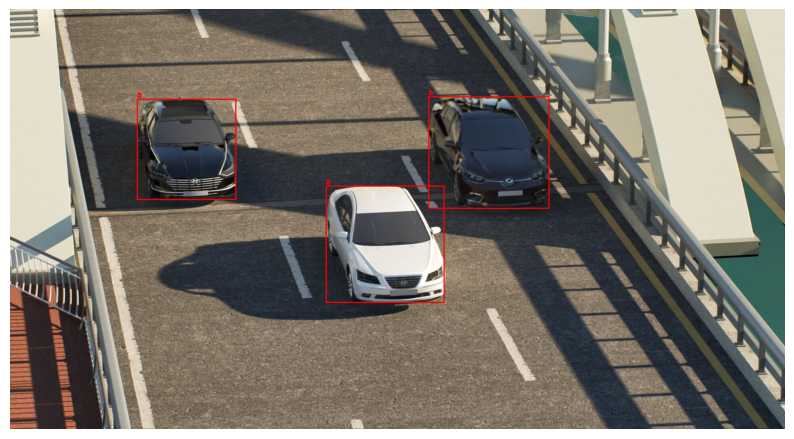

In [15]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image  # 필요 시 사용

def draw_boxes_on_image(image_path : str, annotation_path : str,
                        img_width : int, img_height : int):
    ''' 이미지와 바운딩 박스를 그리는 함수
    Args:
        image_path (str): 이미지 파일 경로
        annotation_path (str): 라벨 파일 경로 (.txt)
        img_width (int): 이미지의 너비
        img_height (int): 이미지의 높이
    Returns:
        show image: 이미지와 바운딩 박스가 그려진 이미지
    '''

    # 이미지 불러오기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # txt 파일에서 Class ID와 Bounding Box 정보 읽기
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    print(f"읽은 라벨 개수: {len(lines)}")  # 몇 개의 바운딩 박스를 읽었는지 확인용

    for line in lines:
        values = list(map(float, line.strip().split(' ')))
        class_id = int(values[0])

        # YOLO 형식의 좌표를 원래 이미지 크기에 맞게 변환
        x_center = values[1] * img_width
        y_center = values[2] * img_height
        box_width = values[3] * img_width
        box_height = values[4] * img_height

        # 좌표 계산
        x_min = int(round(x_center - (box_width / 2)))
        y_min = int(round(y_center - (box_height / 2)))
        x_max = int(round(x_center + (box_width / 2)))
        y_max = int(round(y_center + (box_height / 2)))

        print(f"클래스 {class_id}: ({x_min}, {y_min}) → ({x_max}, {y_max})")  # 확인용


        # 이미지에 바운딩 박스 그리기
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, str(class_id), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 이미지와 바운딩 박스 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # 축 숨기기
    plt.show()


#### 검증 함수 실행!!
image_file = os.path.join(origin_dir, 'syn_00068.png')
annotation_file = os.path.join(edit_label_dir, 'syn_00068.txt')
img_width, img_height = Image.open(image_file).size

draw_boxes_on_image(image_file, annotation_file, img_width, img_height)

# 6. train/valid/test set 분리
- 간단한 데이터셋 통계량 확인하고, 데이터셋 비율을 정해줍니다.
  - 차량 데이터 총 개수 확인 (참고 : glob 모듈 사용)
- 학습/검증/테스트셋 분리
  - train_test_split 라이브러리를 활용하여 test_size 인자로 데이터셋 비율을 조절할 수 있습니다. (train_test_split라이브러리는 데이터셋을 분리하는데에 많이 사용되고 있습니다.)
  - trainset : validset : testset  = 6 : 2 : 2

In [19]:
# 학습/검증/테스트셋 분리
# glob : 특정 패턴을 가진 파일 경로 찾을 때 쓰는 파일 탐색 모듈 
# "*.txt" 같은 패턴을 지정하고 찾는 용 
from sklearn.model_selection import train_test_split

''' 피드백
.png를 .txt로 변경하는 부분에서 .replace()를 사용하고 있는데, 이 방식에서는 .jpg , .jpeg등 다양한 확장자가 있을 경우 문제가 생길 수 있을 것 같습니다. 
os.path.splitext()를 사용하여 확장자를 분리하고, .txt로 변경하는 방식으로 수정하면 좋을 것 같습니다. 

아니면 data_dir에 있는 모든 파일을 basename만 불러와서 txt 파일 리스트를 만들어주는 방식으로 수정해도 좋을 것 같습니다. 
'''

# 차량 데이터 총 개수 
data_dir = '/Users/tasha/Desktop/comento/dataset/train' 
imgs = glob.glob(os.path.join(data_dir,'*.png'))
print(f"차량 데이터 총 개수: {len(imgs)}")

# 같은 이름의 txt 라벨 파일 리스트 만들기
# 각 이미지에 대응되는 txt의 경로를 찾아주는 작업이 필요했기 떄문. 
# 사실 같은 폴더라서 굳이 안해도 되지만, 어떻게 매칭되는 지 알려고 만드는 것이 더 안전함. 

# 변환된 YOLO 라벨 파일 리스트 생성 (edit_label_dir 기준)
all_labels = [os.path.join(edit_label_dir, os.path.splitext(os.path.basename(img))[0] + '.txt') for img in imgs]
# 이게 안전하고 정확함. 확장자 종류에 상관없이 만들 수 있기 때문에 더 유용함. 

# all_labels = [os.path.join(data_dir, os.path.basename(img).split('.')[0] + '.txt') for img in imgs]
# 이것도 가능함. 이름에서 처음 .을 기준으로 분리. 이름에 .이 여러개면 문제가 됨. 


# 학습/검증/데트스 셋 분리 
# X_train은 이미지 파일 경로, y_train은 그에 대응하는 라벨 파일 경로가 됩니다. 마찬가지로 X_valid, y_valid, X_test, y_test도 동일
# 1차 분할 :train (60%), 나머지 (40%)
X_train, X_temp, y_train, y_temp = train_test_split(imgs, all_labels, test_size=0.4, random_state=42)

# 2차 분할: validation (20%), test(20%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 반절 나누니깐

print(f"Train 개수: {len(X_train)}")
print(f"Validation 개수: {len(X_valid)}")
print(f"Test 개수: {len(X_test)}")

차량 데이터 총 개수: 6481
Train 개수: 3888
Validation 개수: 1296
Test 개수: 1297


# 7. 학습용 train/valid/test 데이터셋 폴더 생성

- 위에서 분리한 train/valid/testset을 옮겨둘 폴더를 생성하고, 파일을 복사해서 옮겨줍니다.
- 아래의 폴더 구조로 만들어주세요.

```
└── datasets /
    ├── images /
        ├── train /
            ├── 1.png
            ├── 2.png
        ├── val /
            ├── 3.png
            ├── 4.png
        ├── test /
            ├── 5.png
            ├── 6.png
    ├── labels /
        ├── train /
            ├── 1.txt
            ├── 2.txt
        ├── val /
            ├── 3.txt
            ├── 4.txt
        ├── test /
            ├── 5.txt
            ├── 6.txt
```

- 데이터를 저장하고자 하는 곳으로 이동 (참고 : shutil.copy 라이브러리 사용)
- 참고 자료: https://docs.ultralytics.com/datasets/detect/#ultralytics-yolo-format
- 구글드라이브의 용량이 부족하다면 데이터를 조금 더 삭제해서 줄여도 괜찮습니다.

In [20]:
# 데이터셋 저장 폴더 생성
def make_dirs():
    for folder in ['train', 'val', 'test']:
        os.makedirs(os.path.join(save_dir, 'images', folder), exist_ok=True)
        os.makedirs(os.path.join(save_dir, 'labels', folder), exist_ok=True)

make_dirs()

# 파일 이동 함수 (YOLO 변환된 라벨 적용)
def move_files(image_list, label_list, split_type):
    for img, lbl in tqdm(zip(image_list, label_list), total=len(image_list), desc=f"Moving {split_type} files"):
        # 이미지 저장
        shutil.copy(img, os.path.join(save_dir, 'images', split_type, os.path.basename(img)))
        
        # 변환된 YOLO 라벨이 존재하는 경우에만 저장
        if os.path.exists(lbl):
            shutil.copy(lbl, os.path.join(save_dir, 'labels', split_type, os.path.basename(lbl)))
        else:
            print(f"🚨 Warning: {os.path.basename(lbl)} 라벨 파일이 없습니다!")

# YOLO 형식으로 변환된 데이터 적용
move_files(X_train, y_train, 'train')
move_files(X_valid, y_valid, 'val')
move_files(X_test, y_test, 'test')

print("✅ YOLO 변환된 라벨 적용 완료!")

Moving test files: 100%|███████████████████| 1297/1297 [00:08<00:00, 153.64it/s]

✅ YOLO 변환된 라벨 적용 완료!


In [39]:
# 폴더 안에 파일 개수 세기 확인용

#폴더 목록
folders = ['train', 'val', 'test']

# 폴더 안에 모든 파일 개수 세기
for folder in tqdm(folders, desc="processing folders"):
    for subfolder in ['images', 'labels']: # images와 labels에 대해 반복
        folder_path = os.path.join("/Users/tasha/Desktop/comento/dataset/datasets", subfolder, folder)

        # 폴더 안의 모든 파일 가져오기 
        files = os.listdir(folder_path)
    
        #파일만 필터링 (디렉토리 제외)
        file_count = len([f for f in files if os.path.isfile(os.path.join(folder_path, f))])
    
        print(f"{subfolder} {folder} 파일 개수: {file_count}")

processing folders: 100%|█████████████████████████| 3/3 [00:00<00:00, 26.30it/s]

images train 파일 개수: 3888
labels train 파일 개수: 3888
images val 파일 개수: 1296
labels val 파일 개수: 1296
images test 파일 개수: 1297
labels test 파일 개수: 1297



- 학습에 사용되는 .yaml 파일을 아래 형식에 맞춰서 만들어줍니다.

```
names:
- car
nc: 1
path: "dataset_folder_root_path"
test: "test_image_dataset_folder_path"
train: "train_image_dataset_folder_path"
val: "validation_image_dataset_folder_path"
```

In [21]:
# yaml 파일 생성 코드 작성 후 저장
# 클래스 이름 정의
import yaml

# 저장할 경로 #경로 명시해야지 생김. 
yaml_path = "/Users/tasha/Desktop/comento/dataset/datasets/data.yaml"

data = {
    'names': ["car"],
    'nc': 1,
    'path': "/Users/tasha/Desktop/comento/dataset/datasets",
    'train': "/Users/tasha/Desktop/comento/dataset/datasets/images/train",
    'val': "/Users/tasha/Desktop/comento/dataset/datasets/images/val",
    'test': "/Users/tasha/Desktop/comento/dataset/datasets/images/test"
}

# YAML 파일 저장
with open(yaml_path, 'w') as file:
    yaml.dump(data, file)

print(f"YAML 파일 생성 완료! → {yaml_path}")

YAML 파일 생성 완료! → /Users/tasha/Desktop/comento/dataset/datasets/data.yaml


In [22]:
# 생성한 YAML 파일 읽기
yaml_path = '/Users/tasha/Desktop/comento/dataset/datasets/data.yaml'

with open(yaml_path, 'r') as f:
    data = yaml.full_load(f)

# 내용 출력
print(data)

{'names': ['car'], 'nc': 1, 'path': '/Users/tasha/Desktop/comento/dataset/datasets', 'test': '/Users/tasha/Desktop/comento/dataset/datasets/images/test', 'train': '/Users/tasha/Desktop/comento/dataset/datasets/images/train', 'val': '/Users/tasha/Desktop/comento/dataset/datasets/images/val'}
